In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("data/train.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
data = data.drop(["Condition1", "Condition2",
                 "MiscVal", "MiscFeature", "GarageYrBlt",
                 "GarageCars", "GarageFinish", "GarageType",
                 "Fireplaces", "FireplaceQu", "PavedDrive", "MasVnrArea",
                  "MasVnrType", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
                  "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                  "ScreenPorch", "BsmtFinType1", "BsmtFinType2",
                  "BsmtFinSF1", "BsmtFinSF2", "Id", "PoolQC", "Fence", "Alley", "PoolArea",
                  "Exterior1st", "Exterior2nd", "BsmtExposure", "MoSold", "YrSold"
                  ], axis=1)


In [11]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenQual,TotRmsAbvGrd,Functional,GarageArea,GarageQual,GarageCond,SaleType,SaleCondition,SalePrice,bathrooms
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,8,Typ,548,TA,TA,WD,Normal,208500,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,6,Typ,460,TA,TA,WD,Normal,181500,3
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,Gd,6,Typ,608,TA,TA,WD,Normal,223500,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,Gd,7,Typ,642,TA,TA,WD,Abnorml,140000,2
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,Gd,9,Typ,836,TA,TA,WD,Normal,250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,7,Typ,460,TA,TA,WD,Normal,175000,3
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,7,Min1,500,TA,TA,WD,Normal,210000,3
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,9,Typ,252,TA,TA,WD,Normal,266500,2
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,Gd,5,Typ,240,TA,TA,WD,Normal,142125,2


In [23]:
data['bathrooms'] = data[["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"]].sum(axis=1)
data = data.drop(["BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath"], axis=1)
Y = data["SalePrice"]
X = data.drop(['SalePrice'], axis=1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageArea,GarageQual,GarageCond,SaleType,SaleCondition,bathrooms
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,Gd,8,Typ,548,TA,TA,WD,Normal,4
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,1,TA,6,Typ,460,TA,TA,WD,Normal,3
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,1,Gd,6,Typ,608,TA,TA,WD,Normal,4
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,1,Gd,7,Typ,642,TA,TA,WD,Abnorml,2
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,Gd,9,Typ,836,TA,TA,WD,Normal,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,TA,7,Typ,460,TA,TA,WD,Normal,3
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,TA,7,Min1,500,TA,TA,WD,Normal,3
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,Gd,9,Typ,252,TA,TA,WD,Normal,2
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,1,Gd,5,Typ,240,TA,TA,WD,Normal,2


In [15]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets, model_selection
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

/var/folders/t7/jg5qdbm57gv0xlsy9nhjgtcw0000gn/T/ipykernel_7656/1204712865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


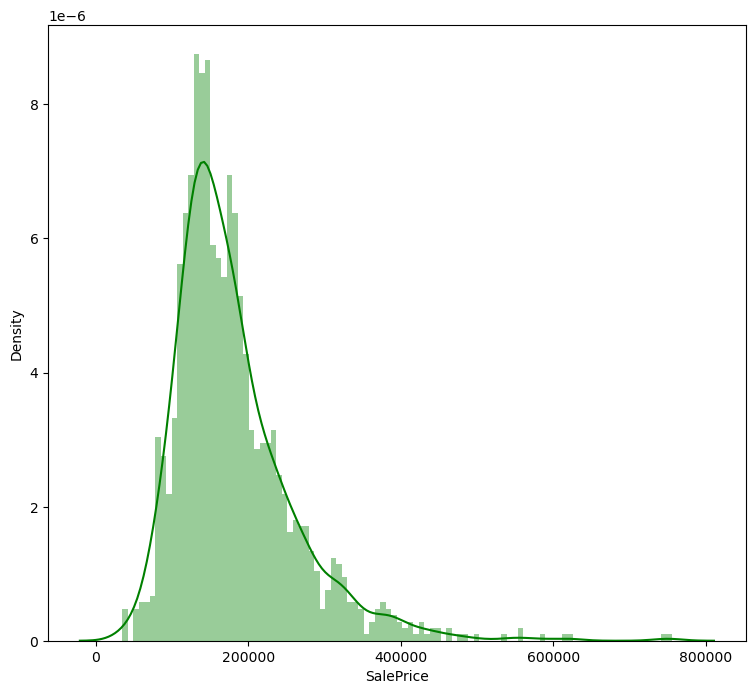

In [16]:
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


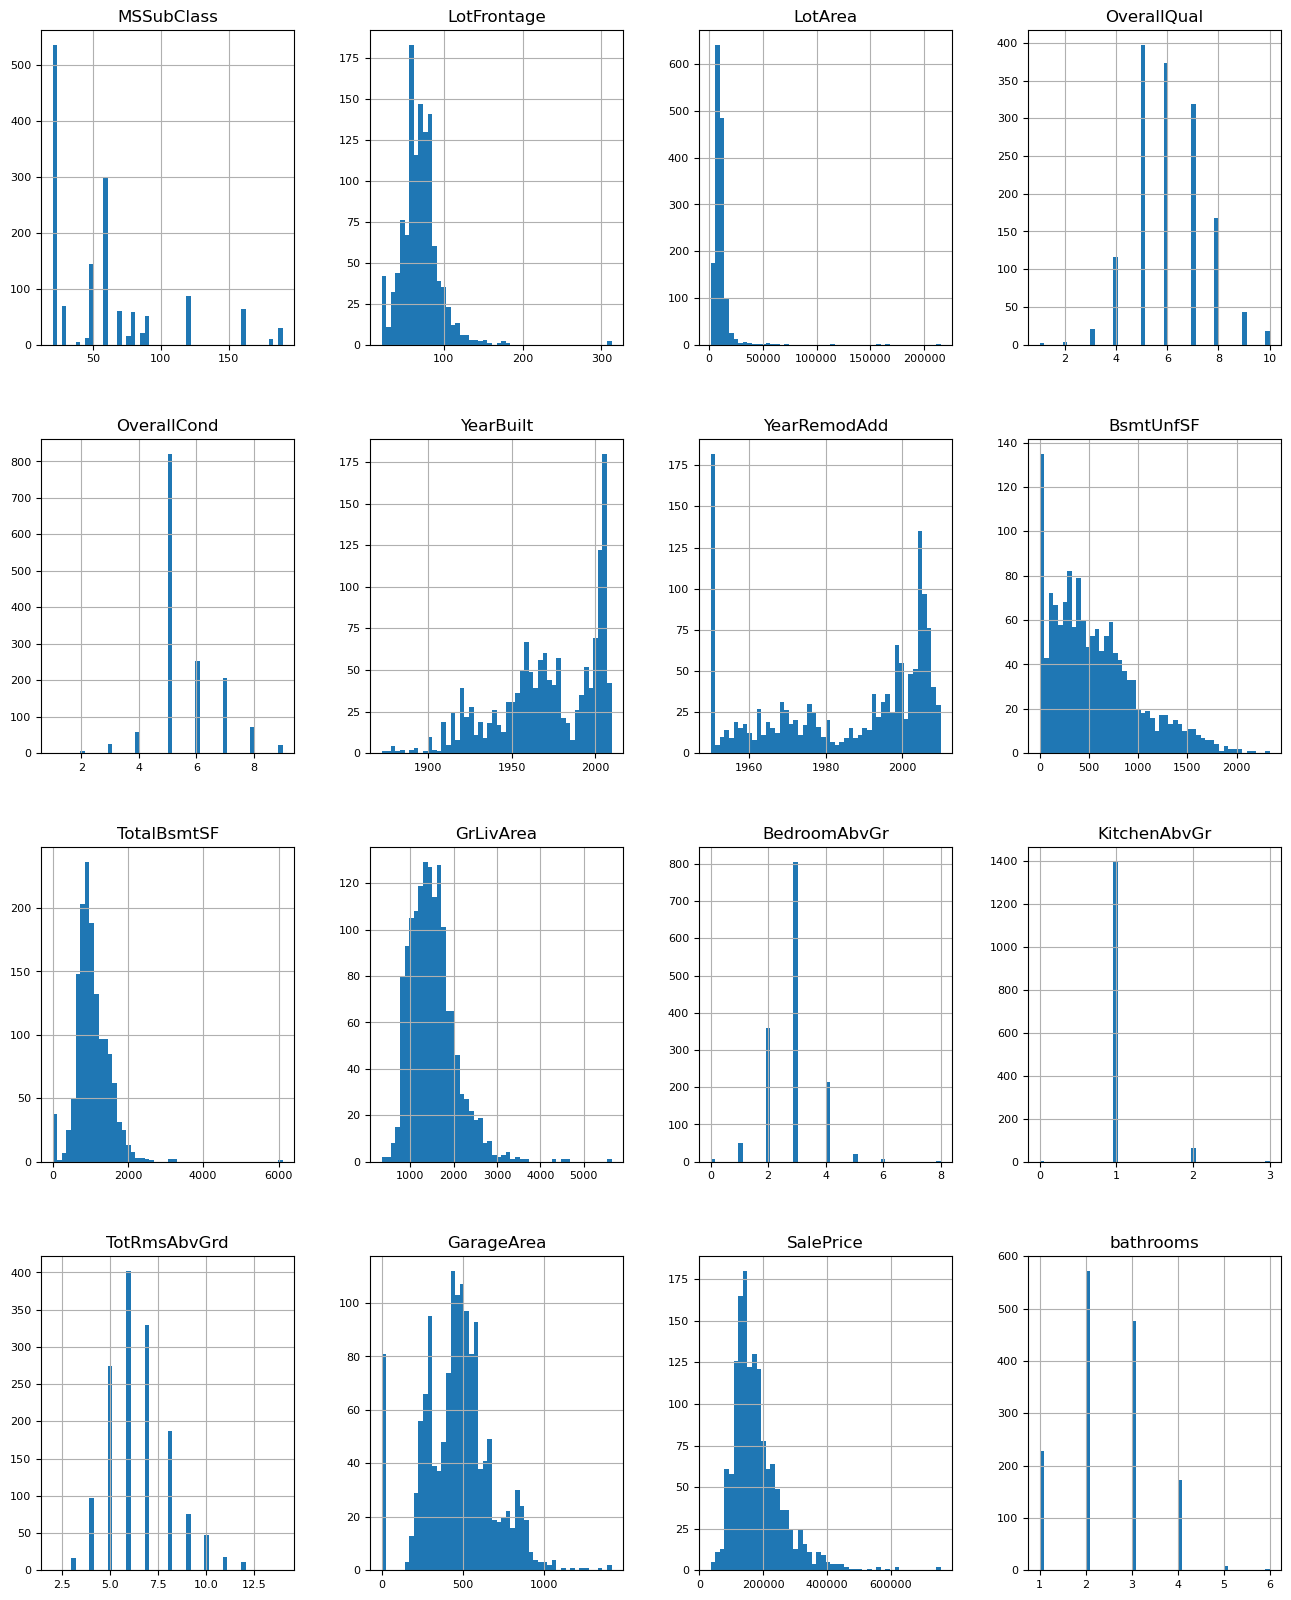

In [25]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


In [27]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))


There is 15 strongly correlated values with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
LotFrontage     0.351799
LotArea         0.263843
BsmtUnfSF       0.214479
BedroomAbvGr    0.168213
OverallCond    -0.077856
MSSubClass     -0.084284
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


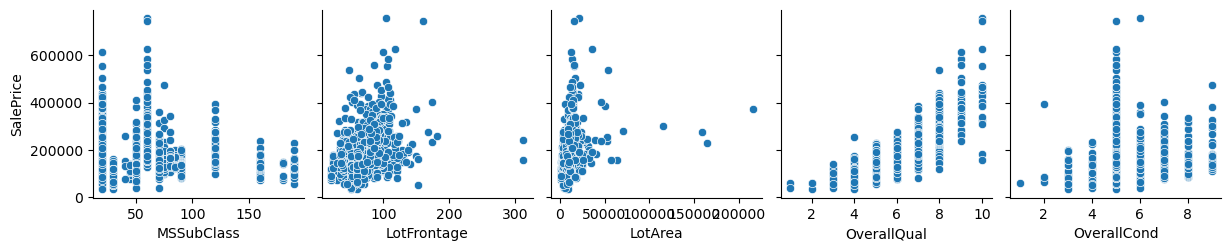

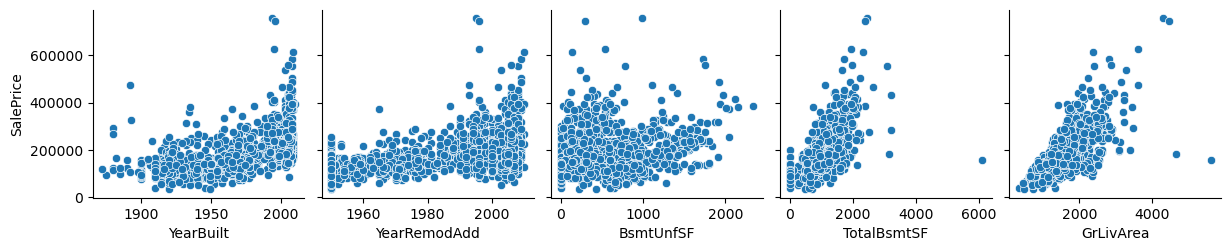

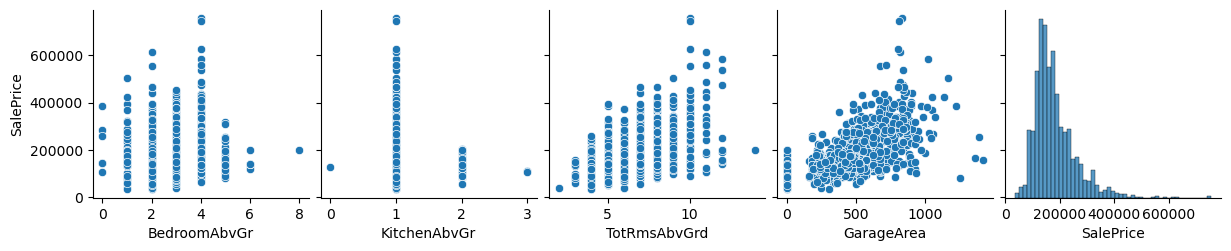

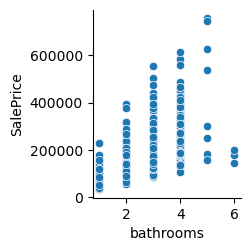

In [28]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

In [ ]:
"""
Remove outliers
Deal with categorical data
"""